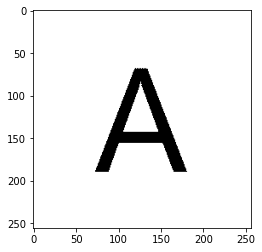

In [35]:
import numpy as np

from PIL import Image
from matplotlib import pyplot as plt
import optimize
import pandas as pd

secret = np.logical_not(np.array(Image.open("../A_256.png").convert("1"), dtype=bool))
plt.imshow(secret, cmap="gray_r")

# avg

In [36]:
K = 7
# TIMES = 5
ks = [i for i in range(2, K + 1)]
result = []
ws=35
markov=2000
for i in ks:
    result.append(
        optimize.optimize_sa3(i, markov=markov , initial_temp=0.1, terminated_temp=0.1 / (2000 ), ws=ws))
    print(f"k={i} Done.")


k=2 Done.
k=3 Done.
k=4 Done.
k=5 Done.
k=6 Done.
k=7 Done.


[0.16384906839237978, 0.14949600917657957, 0.09587430573919292, 0.06843987334138288, 0.0853095992466148, 0.12311726315874136]


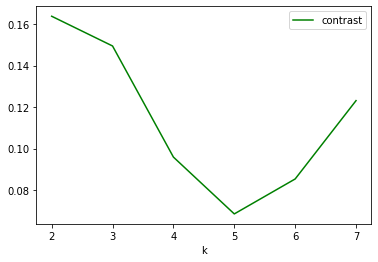

In [37]:
plt.xlabel("k")
plt.plot(ks, list(map(lambda x: x.contrast, result)), label="contrast", color="green")
plt.legend()
print(list(map(lambda x: x.contrast, result)))

In [38]:
from optimize import safety_penalty_list

import os
path=f"./sa3_safety_ws={ws}_markov={markov}"
if not os.path.exists(path):
    os.mkdir(path)

safety = []
for res in result:
    safety.append(safety_penalty_list(res.variables))
pd.DataFrame(safety).to_csv(f"{path}/ws.csv")
pd.DataFrame(safety)

,0,1,2,3,4,5
0,0.000096,NaN,NaN,NaN,NaN,NaN
1,0.005205,0.072453,NaN,NaN,NaN,NaN
2,0.001105,0.005749,0.050090,NaN,NaN,NaN
3,0.011548,0.005074,0.011624,0.039460,NaN,NaN
4,0.011723,0.003031,0.008121,0.031817,0.058862,NaN
5,0.002270,0.005401,0.012859,0.040918,0.070627,0.098412


In [39]:

for i in range(len(result)):
    pd.DataFrame(result[i].variables).to_csv(f"{path}/k={i + 2}.csv")
